In [64]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import norm

In [65]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [66]:
os.chdir('../data')

FileNotFoundError: [Errno 2] No such file or directory: './data'

In [ ]:
df = pd.read_csv('IMDB_Dataset.csv')
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


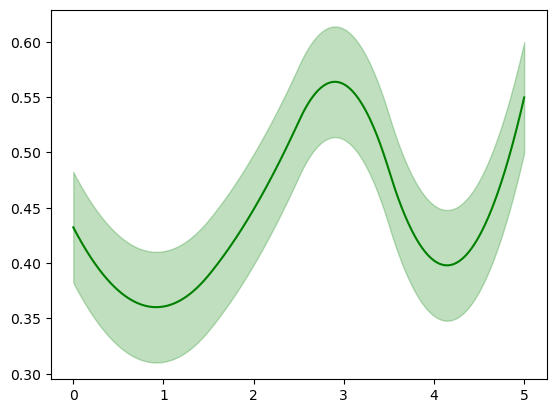

<Figure size 5000x5000 with 0 Axes>

In [80]:
test_adjectives = ['fat', 'lazy', 'stupid', 'fit', 'hardworking', 'smart']
test_nationalities = ['european']

ta_embeddings = model.encode(test_adjectives)
tn_embeddings = model.encode(test_nationalities)

test_cos = cosine_similarity(
    [tn_embeddings[0]],
    ta_embeddings[:]
)


european_cs_df = pd.DataFrame(test_cos)
european_cs_df = european_cs_df.transpose()

european_cs_df['index_col'] = european_cs_df.index

# European
x = european_cs_df["index_col"]
y = european_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=0, stop=5, num=1000)
y2 = fun(x2)

plt.plot(x2, y2, color='g')
plt.plot(x, y, ls='', marker='o', color='g', alpha=0)

# Fill Between
error = .05
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='g')

plt.figure(figsize=(50, 50))
plt.show()

In [74]:
nationality_vector = ['American', 'Canadian', 'English', 'French', 'Chinese', 'Japanese']

In [104]:
df_neg500 = df[df['sentiment'] == 'negative'].head(500)
df_pos500 = df[df['sentiment'] == 'positive'].head(500)

samples = [df_neg500, df_pos500]
df_sentiment500 = pd.concat(samples)
sentences = df_sentiment500.to_numpy()

In [105]:
sentence_embeddings = model.encode(sentences)
nv_embeddings = model.encode(nationality_vector)

In [109]:
cs_arr = cosine_similarity(
    [nv_embeddings[0]],
    sentence_embeddings[1:]
)

In [110]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]

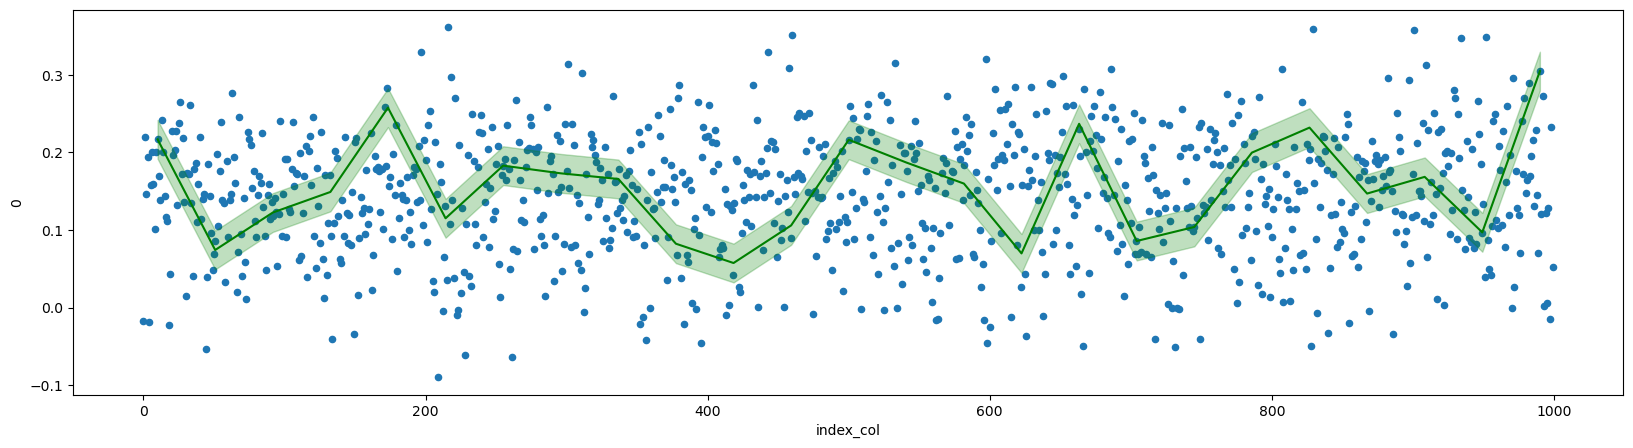

In [128]:
test_cos = cosine_similarity(
    [nv_embeddings[0]],
    sentence_embeddings[:]
)

american_cs_df = pd.DataFrame(test_cos)
american_cs_df = american_cs_df.transpose()

american_cs_df['index_col'] = american_cs_df.index

american_cs_df.plot.scatter(x="index_col", y=0)

x = american_cs_df["index_col"]
y = american_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=10, stop=990, num=25)
y2 = fun(x2)

plt.plot(x2, y2, color='g')
plt.plot(x, y, ls='', marker='o', color='g', alpha=0)

# Fill Between
error = .025
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='g')
plt.show()

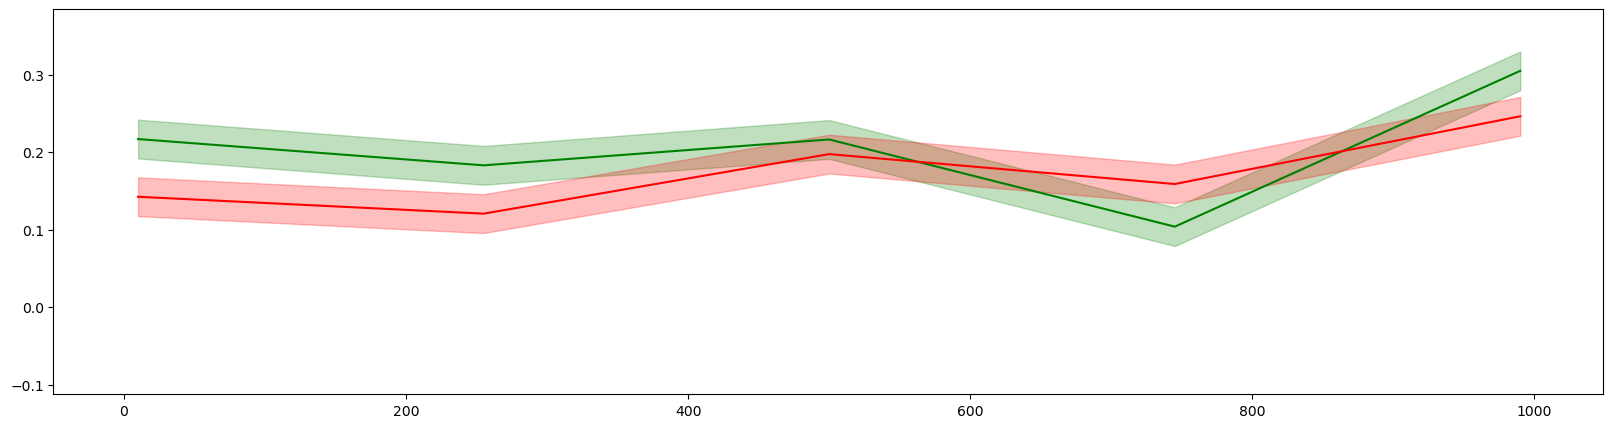

In [131]:
test_cos = cosine_similarity(
    [nv_embeddings[0]],
    sentence_embeddings[:]
)

american_cs_df = pd.DataFrame(test_cos)
american_cs_df = american_cs_df.transpose()

american_cs_df['index_col'] = american_cs_df.index

#american_cs_df.plot.scatter(x="index_col", y=0)

x = american_cs_df["index_col"]
y = american_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=10, stop=990, num=5)
y2 = fun(x2)

plt.plot(x2, y2, color='g')
plt.plot(x, y, ls='', marker='o', color='g', alpha=0)

# Fill Between
error = .025
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='g')

# --------------------------------------------------------------------- #
test_cos = cosine_similarity(
    [nv_embeddings[1]],
    sentence_embeddings[:]
)

canadian_cs_df = pd.DataFrame(test_cos)
canadian_cs_df = canadian_cs_df.transpose()

canadian_cs_df['index_col'] = canadian_cs_df.index

x = canadian_cs_df["index_col"]
y = canadian_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=10, stop=990, num=5)
y2 = fun(x2)

plt.plot(x2, y2, color='r')
plt.plot(x, y, ls='', marker='o', color='r', alpha=0)

# Fill Between
error = .025
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='r')
plt.show()

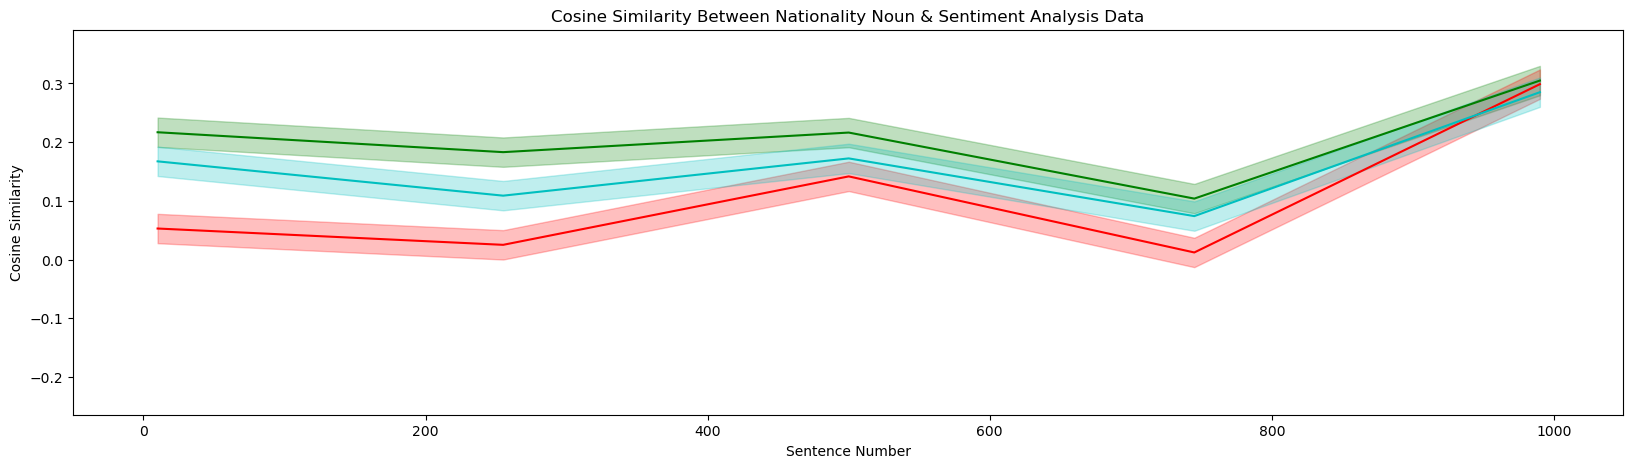

In [143]:
test_cos = cosine_similarity(
    [nv_embeddings[0]],
    sentence_embeddings[:]
)

american_cs_df = pd.DataFrame(test_cos)
american_cs_df = american_cs_df.transpose()

american_cs_df['index_col'] = american_cs_df.index

#american_cs_df.plot.scatter(x="index_col", y=0)

x = american_cs_df["index_col"]
y = american_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=10, stop=990, num=5)
y2 = fun(x2)

plt.plot(x2, y2, color='g')
plt.plot(x, y, ls='', marker='o', color='g', alpha=0)

# Fill Between
error = .025
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='g')

# --------------------------------------------------------------------- #
test_cos = cosine_similarity(
    [nv_embeddings[2]],
    sentence_embeddings[:]
)

english_cs_df = pd.DataFrame(test_cos)
english_cs_df = english_cs_df.transpose()

english_cs_df['index_col'] = english_cs_df.index

x = english_cs_df["index_col"]
y = english_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=10, stop=990, num=5)
y2 = fun(x2)

plt.plot(x2, y2, color='r')
plt.plot(x, y, ls='', marker='o', color='r', alpha=0)

# Fill Between
error = .025
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='r')

# --------------------------------------------------------------------- #
test_cos = cosine_similarity(
    [nv_embeddings[4]],
    sentence_embeddings[:]
)

chinese_cs_df = pd.DataFrame(test_cos)
chinese_cs_df = chinese_cs_df.transpose()

chinese_cs_df['index_col'] = chinese_cs_df.index

x = chinese_cs_df["index_col"]
y = chinese_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=10, stop=990, num=5)
y2 = fun(x2)

plt.plot(x2, y2, color='c')
plt.plot(x, y, ls='', marker='o', color='c', alpha=0)

# Fill Between
error = .025
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='c')

plt.title('Cosine Similarity Between Nationality Noun & Sentiment Analysis Data')
plt.xlabel("Sentence Number")
plt.ylabel("Cosine Similarity")
plt.show()

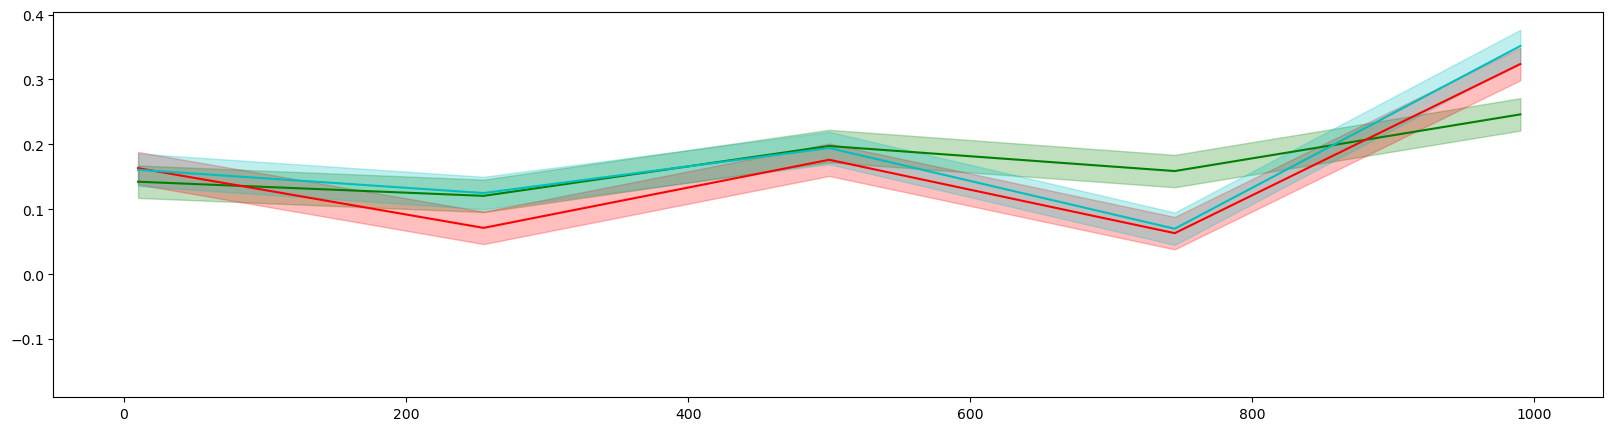

In [146]:
test_cos = cosine_similarity(
    [nv_embeddings[1]],
    sentence_embeddings[:]
)

canadian_cs_df = pd.DataFrame(test_cos)
canadian_cs_df = canadian_cs_df.transpose()

canadian_cs_df['index_col'] = canadian_cs_df.index

#american_cs_df.plot.scatter(x="index_col", y=0)

x = canadian_cs_df["index_col"]
y = canadian_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=10, stop=990, num=5)
y2 = fun(x2)

plt.plot(x2, y2, color='g')
plt.plot(x, y, ls='', marker='o', color='g', alpha=0)

# Fill Between
error = .025
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='g')

# --------------------------------------------------------------------- #
test_cos = cosine_similarity(
    [nv_embeddings[3]],
    sentence_embeddings[:]
)

french_cs_df = pd.DataFrame(test_cos)
french_cs_df = french_cs_df.transpose()

french_cs_df['index_col'] = french_cs_df.index

x = french_cs_df["index_col"]
y = french_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=10, stop=990, num=5)
y2 = fun(x2)

plt.plot(x2, y2, color='r')
plt.plot(x, y, ls='', marker='o', color='r', alpha=0)

# Fill Between
error = .025
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='r')

# --------------------------------------------------------------------- #
test_cos = cosine_similarity(
    [nv_embeddings[5]],
    sentence_embeddings[:]
)

japanese_cs_df = pd.DataFrame(test_cos)
japanese_cs_df = japanese_cs_df.transpose()

japanese_cs_df['index_col'] = japanese_cs_df.index

x = japanese_cs_df["index_col"]
y = japanese_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=10, stop=990, num=5)
y2 = fun(x2)

plt.plot(x2, y2, color='c')
plt.plot(x, y, ls='', marker='o', color='c', alpha=0)

# Fill Between
error = .025
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='c')

plt.show()